# 3. Time series in pandas

Dalam bab ini, Anda akan belajar cara memanipulasi dan memvisualisasikan data deret waktu (*time series*) menggunakan pandas. Anda akan terbiasa dengan konsep-konsep seperti `upsampling`, `downsampling`, dan `interpolasi`. Anda akan berlatih menggunakan metode chaining untuk memfilter data Anda secara efisien dan melakukan analisis deret waktu. Dari harga saham hingga waktu penerbangan, data deret waktu dapat ditemukan di berbagai domain, dan dapat bekerja secara efektif dengan itu adalah keterampilan yang sangat berharga.

## Indexing time series

### Reading and slicing times

Untuk latihan ini, kami telah membaca dalam file data yang sama menggunakan tiga pendekatan berbeda:
* <pre>df1 = pd.read_csv(filename)</pre>
* <pre>df2 = pd.read_csv(filename, parse_dates=['Date'])</pre>
* <pre>df3 = pd.read_csv(filename, index_col='Date', parse_dates=True)</pre>

Gunakan metode `.head()` dan `.info()` di IPython Shell untuk memeriksa DataFrames. Kemudian, cobalah untuk mengindeks setiap DataFrame dengan string datetime. Manakah dari DataFrames yang dihasilkan memungkinkan Anda untuk dengan mudah mengindeks dan mengiris data berdasarkan tanggal menggunakan, misalnya, `df1.loc['2010-Aug-01']`?

**Answer** : `df3`

In [2]:
import pandas as pd

filename = 'https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv'

df1 = pd.read_csv(filename)
df2 = pd.read_csv(filename, parse_dates=['Date'])
df3 = pd.read_csv(filename, index_col='Date', parse_dates=True)

In [4]:
df3.loc['2010-Aug-01'].head()

,Temperature,DewPoint,Pressure
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0


**Note** : Inilah sebabnya mengapa penting untuk membaca data Anda dengan benar, terutama ketika bekerja dengan data deret waktu.

### Creating and using a DatetimeIndex

Indeks pandas adalah cara yang ampuh untuk menangani data deret waktu, jadi sangat berharga untuk mengetahui cara membuat sendiri. Pandas menyediakan fungsi `pd.to_datetime()` hanya untuk tugas ini. Misalnya, jika melewati list string `['2015-01-01 091234', '2015-01-01 091234']` dan variabel spesifikasi `format`, seperti `format='%Y-%m-%d %H%M%S`, pandas akan mengurai string ke elemen datetime yang tepat dan membangun objek datetime.

Dalam latihan ini, list data suhu dan list string tanggal telah dimuat sebelumnya untuk Anda masing-masing sebagai `temperature_list` dan `date_list`. Tugas Anda adalah menggunakan metode `.to_datetime()` untuk membangun *DatetimeIndex* dari list string tanggal, dan kemudian menggunakannya bersama dengan list data suhu untuk membangun pandas series.

In [8]:
# Load data
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv')

temperature_list = list(df['Temperature'])
date_list = list(df['Date'])

In [10]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

### Partial string indexing and slicing

Pandas time series mendukung pengindeksan "string parsial". Yang artinya, bahkan ketika hanya menggunakan sebagian dari waktu, seperti hanya tanggal tetapi bukan waktu, pandas sangat baik dalam melakukan apa yang diharapkan. Pengindeksan datetime pandas juga mendukung berbagai format string datetime yang umum digunakan, bahkan ketika dicampur.

Dalam latihan ini, serangkaian waktu yang berisi data cuaca setiap jam telah dimuat sebelumnya untuk Anda. Data ini dibaca menggunakan `parse_dates=True` di `read_csv()` dengan `index_col="Dates"` sehingga Indeks itu memang sebuah `DatetimeIndex`.

Semua data dari kolom `'Temperature'` telah diekstraksi ke variabel `ts0`. Tugas Anda adalah menggunakan berbagai string tanggal asli untuk mengekstraksi satu atau lebih banyak nilai dari `ts0`.

Setelah selesai, Anda akan memiliki tiga variabel baru - `ts1`, `ts2`, dan `ts3`. Anda dapat mengiris ini lebih jauh untuk mengekstraksi hanya entri pertama dan terakhir dari masing-masing.

In [59]:
# Load data
df = pd.read_csv('https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv', usecols=['Date', 'Temperature'], index_col="Date", parse_dates=True)

# Convert to series
ts0 = df['Temperature']

In [60]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']

In [63]:
print(ts1)

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
Name: Temperature, dtype: float64


### Reindexing the Index

Pengindeksan ulang berguna dalam persiapan untuk menambah atau menggabungkan dua dataset time series. Untuk mengindeks ulang data, kami menyediakan indeks baru dan meminta pandas untuk mencoba dan mencocokkan data lama dengan indeks baru. Jika data tidak tersedia untuk salah satu tanggal atau waktu indeks baru, Anda harus memberi tahu pandas cara mengisinya. Jika tidak, pandas akan diisi dengan `NaN` secara default.

Dalam latihan ini, dua dataset time series yang berisi data harian telah dimuat sebelumnya untuk Anda, masing-masing diindeks berdasarkan tanggal. Yang pertama, `ts1`, termasuk akhir pekan, tetapi yang kedua, `ts2`, tidak. Tujuannya adalah untuk menggabungkan dua dataset dengan cara yang masuk akal. Tugas Anda adalah mengindeks ulang kumpulan data kedua sehingga memiliki akhir pekan juga, lalu menambahkannya ke yang pertama. Ketika Anda selesai, akan informatif untuk memeriksa hasil Anda.

In [ ]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method="ffill")

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4

**Note** : Memahami bagaimana pengindeksan dan pengindeksan ulang berfungsi adalah keterampilan yang berharga.

## Resampling time series data

### Resampling and frequency

Pandas menyediakan metode untuk resampling time series data. Ketika downsampling atau upsampling, sintaksnya mirip, tetapi metode yang digunakan berbeda. Keduanya menggunakan konsep 'metode chaining' - `df.method1().method2().method3()` - untuk mengarahkan output dari satu pemanggilan metode ke input berikutnya, dan seterusnya, sebagai urutan operasi, satu memasukkan ke yang berikutnya.

Misalnya, jika Anda memiliki data per jam, dan hanya membutuhkan data harian, pandas tidak akan menebak bagaimana membuang 23 dari 24 poin. Anda harus menentukannya dalam metode ini. Salah satu pendekatan, misalnya, dapat mengambil *mean*, seperti dalam `df.resample('D').mean()`.

Dalam latihan ini, kumpulan data yang berisi data suhu per jam telah dimuat sebelumnya untuk Anda. Tugas Anda adalah menguji ulang data menggunakan berbagai metode agregasi untuk menjawab beberapa pertanyaan.

In [102]:
# Load data
url = 'https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv'
df = pd.read_csv(url, index_col='Date', parse_dates=True)

In [104]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()

In [111]:
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

**Note** : Anda akan mendapatkan lebih banyak latihan dengan resampling dalam latihan yang akan datang!

### Separating and resampling

Dengan pandas, Anda dapat membuat ulang dengan berbagai cara pada subset berbeda dari data Anda. Misalnya, resampling data bulan yang berbeda dengan agregasi yang berbeda. Dalam latihan ini, kumpulan data yang berisi data suhu per jam dari latihan terakhir telah dimuat sebelumnya.

Tugas Anda adalah mengubah sampel data menggunakan berbagai metode agregasi. Anda akan bekerja dengan kolom `'Temperature'`.

In [113]:
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-08-01':'2010-08-31']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-02-01':'2010-02-28']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

In [120]:
august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

### Rolling mean and frequency

Dalam latihan ini, beberapa data cuaca setiap jam dimuat sebelumnya untuk Anda. Anda akan terus berlatih resampling, kali ini menggunakan *rolling means*.

*Rolling means (atau moving averages)* umumnya digunakan untuk menghaluskan fluktuasi jangka pendek dalam data deret waktu dan menyoroti tren jangka panjang. Anda dapat membaca lebih lanjut tentang mereka [di sini](https://en.wikipedia.org/wiki/Moving_average).

Untuk menggunakan metode `.rolling()`, Anda harus selalu menggunakan metode chaining, pertama memanggil `.rolling()` dan kemudian chaining metode agregasi setelahnya. Misalnya, dengan Series `hourly_data`, `hourly_data.rolling(window=24).mean()` akan menghitung nilai baru untuk setiap titik per jam, berdasarkan jendela 24 jam yang membentang di belakang setiap titik. Frekuensi data output sama: masih setiap jam. Operasi semacam itu berguna untuk menghaluskan data deret waktu.

Tugas Anda adalah mengubah sampel data menggunakan kombinasi `.rolling()` dan `.mean()`. Anda akan bekerja dengan DataFrame `df` yang sama dari latihan sebelumnya.

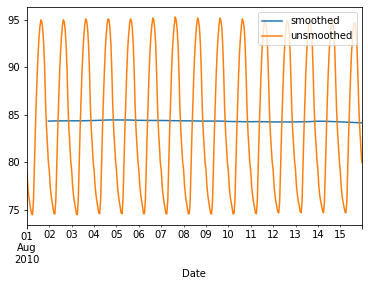

In [122]:
import matplotlib.pyplot as plt

# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-08-01':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

### Resample and roll with it

Pada panda versi 0.18.0, antarmuka untuk menerapkan transformasi rolling ke deret waktu telah menjadi lebih konsisten dan fleksibel, dan terasa agak seperti `groupby` (jika Anda tidak tahu apa itu `groupby`, jangan khawatir, Anda akan belajar tentang itu dalam kursus berikutnya!).

Anda sekarang dapat secara fleksibel menyatukan operasi resampling dan rolling. Dalam latihan ini, data cuaca yang sama dari latihan sebelumnya telah dimuat sebelumnya untuk Anda. Tugas Anda adalah mengekstraksi data satu bulan, resample untuk menemukan suhu tinggi harian, dan kemudian menggunakan operasi rolling dan agregasi untuk menghaluskan data.

In [123]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08-01':'2010-08-31']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


## Manipulating time series data

### Method chaining and filtering

Kami telah melihat bahwa pandas mendukung metode chaining. Teknik ini bisa sangat ampuh saat membersihkan dan memfilter data.

Dalam latihan ini, kita akan menggunakan DataFrame yang berisi data keberangkatan penerbangan untuk satu maskapai penerbangan dan satu bandara untuk bulan Juli 2015. Tugas Anda adalah menggunakan filter `.str()` dan metode chaining untuk menghasilkan statistik ringkasan tentang penundaan penerbangan setiap hari ke Dallas.

**Note** : Data austin airport ini masih berantakan, untuk dapat membacannya menggunakan pandas, Anda dapat melihat carannya pada bab [Pandas Foundations (Delimiters, headers, and extensions)](https://github.com/tommypratama/datacamp/blob/master/Pandas%20Foundations/1.%20Data%20ingestion%20%26%20inspection.ipynb).

In [217]:
# Load data
url = 'https://assets.datacamp.com/production/repositories/497/datasets/5b808399816c8dcb8eef08336595ef9b4eb22902/austin_airport_departure_data_2015_july.csv'

df = pd.read_csv(url, delimiter=',', header=10, parse_dates=True, index_col='Date (MM/DD/YYYY)')
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [222]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()

### Missing values and interpolation

Salah satu aplikasi interpolasi yang umum dalam analisis data adalah mengisi data yang hilang.

Dalam latihan ini, *noisy measured data* memiliki beberapa nilai yang dihapus atau hilang. Tujuannya adalah untuk membandingkan dua seri waktu, dan kemudian melihat perbedaan statistik ringkasan. Masalahnya adalah bahwa salah satu dataset adalah data yang hilang di beberapa waktu. Data `ts1` yang dimuat sebelumnya memiliki nilai untuk semua waktu, namun dataset `ts2` tidak: data yang hilang untuk akhir pekan.

Tugas Anda adalah interpolasi terlebih dahulu untuk mengisi data untuk semua hari. Kemudian, hitung perbedaan antara dua dataset, sekarang mereka berdua memiliki dukungan penuh untuk setiap saat. Akhirnya, buat ringkasan statistik yang menggambarkan distribusi perbedaan.

In [ ]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1 - ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

### Time zones and conversion

Penanganan zona waktu dengan pandas biasanya mengasumsikan bahwa Anda menangani Indeks Series. Dalam latihan ini, Anda akan belajar cara menangani zona waktu yang dikaitkan dengan data dalam data kolom, dan bukan hanya Indeks.

Anda akan bekerja dengan dataset keberangkatan pesawat lagi, dan kali ini Anda akan memilih Los Angeles (`'LAX'`) sebagai bandara tujuan.

Di sini kita akan menggunakan *mask* untuk memastikan bahwa kita hanya menghitung data yang kita inginkan. Untuk mempelajari lebih lanjut tentang *Boolean masks*, klik [di sini](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html)!

In [226]:
# Load data
url = 'https://assets.datacamp.com/production/repositories/497/datasets/5b808399816c8dcb8eef08336595ef9b4eb22902/austin_airport_departure_data_2015_july.csv'

df = pd.read_csv(url, delimiter=',', header=10)

# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

In [227]:
# Build a Boolean mask to filter for the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

## Time series visualization

### Plotting time series, datetime indexing

Pandas menangani datetimes tidak hanya dalam data Anda, tetapi juga dalam plotting.

Dalam latihan ini, beberapa data deret waktu telah dimuat sebelumnya. Namun, kami belum menguraikan kolom seperti tanggal atau menetapkan indeks, seperti yang telah kami lakukan untuk Anda di masa lalu!

Plot yang ditampilkan adalah bagaimana panda membuat data dengan bilangan bulat default / indeks posisi. Tugas Anda adalah mengonversi kolom `'Date'` dari kumpulan string menjadi kumpulan objek datetime. Kemudian, Anda akan menggunakan kolom `'Date'` yang dikonversi ini sebagai indeks baru Anda, dan memplot data kembali, dengan mencatat peningkatan waktu. 

Sebelum melanjutkan, lihat plot yang ditunjukkan dan amati bagaimana pandas menangani data dengan indeks integer default. Kemudian, periksa `df` DataFrame menggunakan metode `.head()` di IPython Shell untuk melihat strukturnya.

In [236]:
url = 'https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv'

df = pd.read_csv(url, usecols=['Temperature', 'Date'], nrows=745)

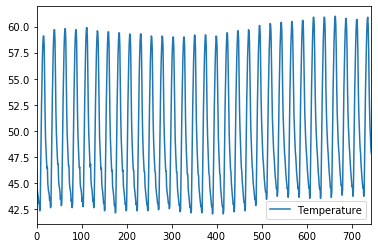

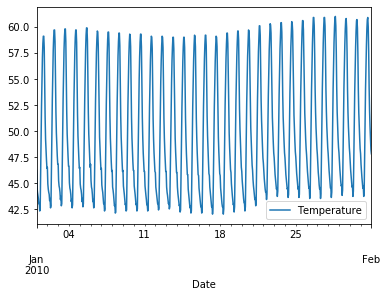

In [237]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df['Date'])

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

### Plotting date ranges, partial indexing

Sekarang Anda telah menetapkan DatetimeIndex di DataFrame Anda, Anda memiliki seperangkat alat yang jauh lebih kuat dan fleksibel untuk digunakan ketika plotting data deret waktu Anda. Dari jumlah tersebut, salah satu yang paling nyaman adalah pengindeksan string dan slicing. Dalam latihan ini, kami telah memuat satu tahun penuh data cuaca Austin 2010, dengan indeks yang ditetapkan sebagai kolom `'Date'` yang diuraikan datanya seperti ditunjukkan dalam latihan sebelumnya.

Tugas Anda adalah menggunakan pengindeksan string parsial tanggal, dalam berbagai format string datetime, untuk memplot semua data musim panas dan hanya satu minggu data bersama-sama.

Pertama, ingatkan diri Anda bagaimana mengekstrak satu bulan data suhu menggunakan `'May 2010'` sebagai kunci ke `df.Temperature[]`, dan panggil `.head()` untuk memeriksa hasilnya: `df.Temperature['May 2010'].head()`.

In [238]:
url = 'https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv'

df = pd.read_csv(url, index_col='Date', parse_dates=True)

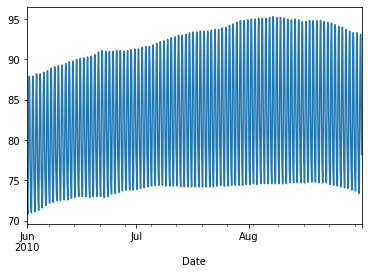

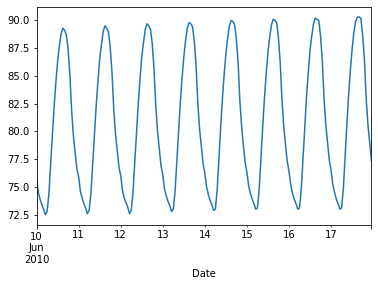

<Figure size 432x288 with 0 Axes>

In [239]:
# Plot the summer data
df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()